In [1]:
import numpy as np
import pandas as pd
import  math
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base.datetools import dates_from_str
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# <font color='blue'>Vector Auto Regression</font> 

## <font color='red'>Example</font> 

### Load Sample Data

In [2]:
mdata = sm.datasets.macrodata.load_pandas().data
mdata

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


### Create dates and take logs

In [3]:
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
quarterly = dates_from_str(quarterly)
mdata = mdata[['realgdp','realcons','realinv']]
mdata.index = pd.DatetimeIndex(quarterly)
data = np.log(mdata).diff().dropna()
data

,realgdp,realcons,realinv
1959-06-30,0.024942,0.015286,0.080213
1959-09-30,-0.001193,0.010386,-0.072131
1959-12-31,0.003495,0.001084,0.034425
1960-03-31,0.022190,0.009534,0.102664
1960-06-30,-0.004685,0.012572,-0.106694
...,...,...,...
2008-09-30,-0.006781,-0.008948,-0.017836
2008-12-31,-0.013805,-0.007843,-0.069165
2009-03-31,-0.016612,0.001511,-0.175598
2009-06-30,-0.001851,-0.002196,-0.067561


### Fit VAR model

In [4]:
model = VAR(data)

In [5]:
results = model.fit(maxlags = 10, ic='aic')  #Desired maxlag level, program does a grid search

In [6]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 03, Jul, 2022
Time:                     15:20:09
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.7388
Nobs:                     201.000    HQIC:                  -27.8562
Log likelihood:           1963.94    FPE:                7.37174e-13
AIC:                     -27.9360    Det(Omega_mle):     6.94859e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.003580         0.000911            3.928           0.000
L1.realgdp         -0.338056         0.172084           -1.964           0.049
L1.realcons         0.746283         0.130411            5.723    

### Visualize Results

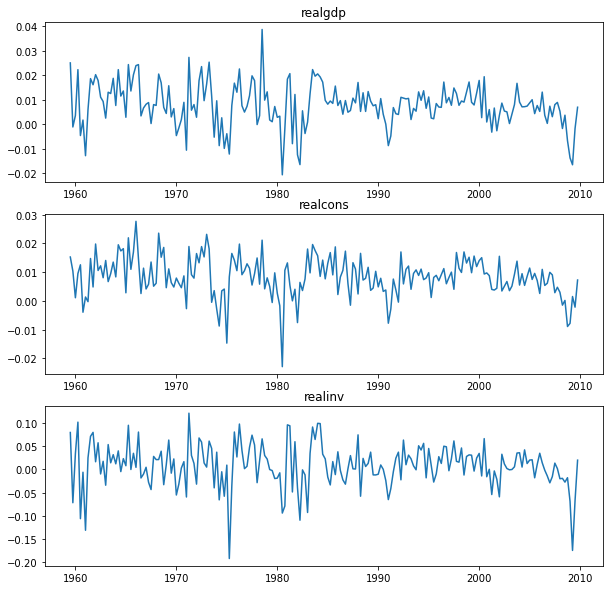

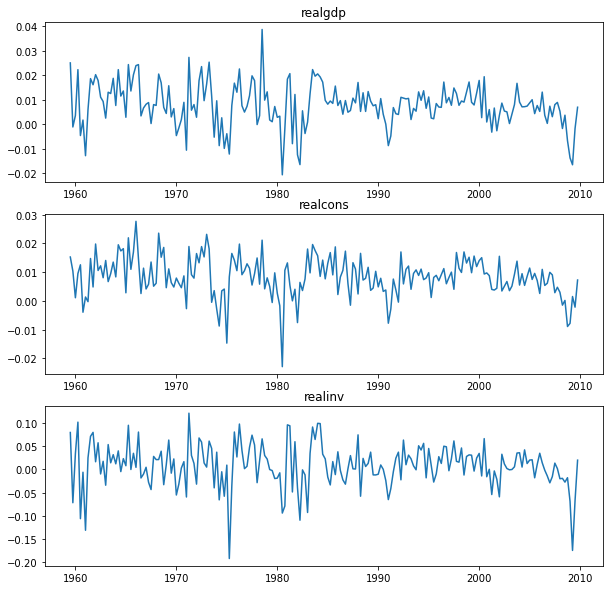

In [7]:
results.plot()

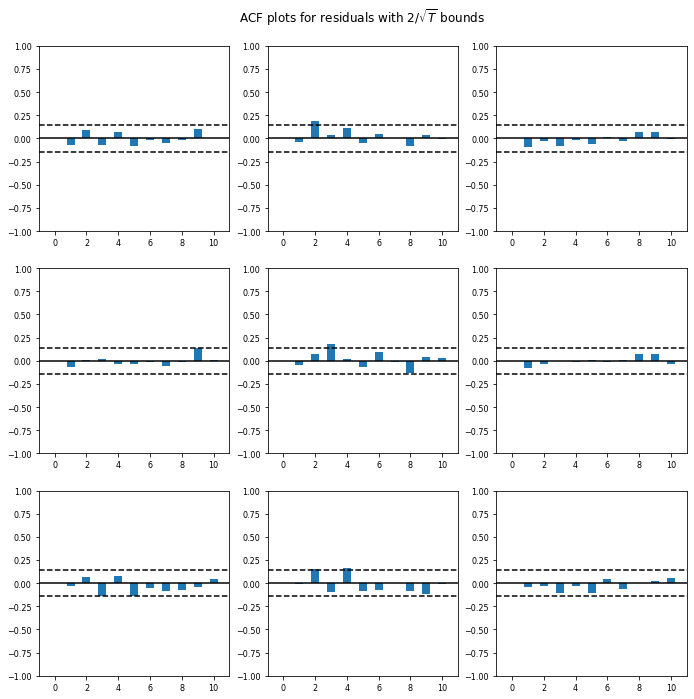

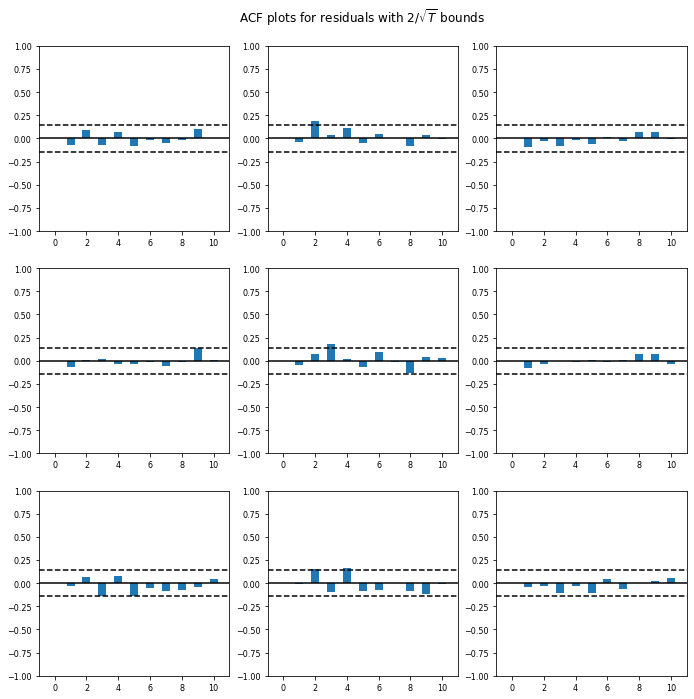

In [8]:
results.plot_acorr()

### Forecast

In [9]:
lag_order = results.k_ar
lag_order

1

In [10]:
results.forecast(data.values[-lag_order:], 1)

array([[0.00785158, 0.00860589, 0.00834729]])

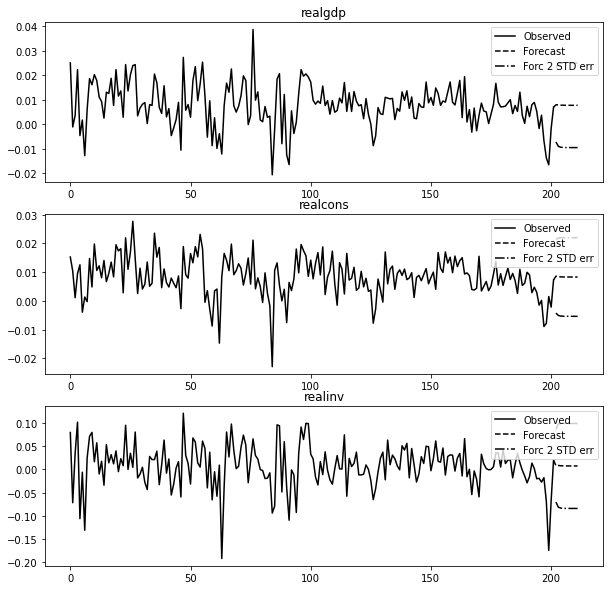

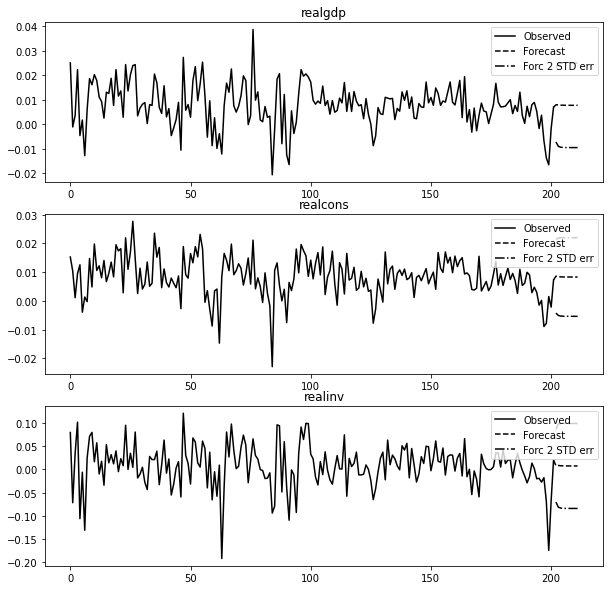

In [11]:
results.plot_forecast(10)

## <font color='red'>Portfolios</font> 

### Import FF5 Factors

In [12]:
pathFF5 = 'FF5_monthly.csv'
FF5_raw = pd.read_csv(pathFF5)
pd.to_datetime(FF5_raw['Date'])
FF5_raw.set_index('Date', inplace = True)
FF5_raw.index = pd.to_datetime(FF5_raw.index, format = '%Y%m')
display(FF5_raw.head())
display(FF5_raw.tail())

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1963-07-01,-0.39,-0.44,-0.89,0.68,-1.23,0.27
1963-08-01,5.07,-0.75,1.68,0.36,-0.34,0.25
1963-09-01,-1.57,-0.55,0.08,-0.71,0.29,0.27
1963-10-01,2.53,-1.37,-0.14,2.80,-2.02,0.29
1963-11-01,-0.85,-0.89,1.81,-0.51,2.31,0.27


,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2021-08-01,2.90,-0.79,-0.13,-0.26,-1.67,0.00
2021-09-01,-4.37,1.25,5.09,-1.94,2.08,0.00
2021-10-01,6.65,-2.69,-0.44,1.74,-1.48,0.00
2021-11-01,-1.55,-1.74,-0.53,7.38,1.60,0.00
2021-12-01,3.10,-0.68,3.22,4.75,4.38,0.01


### Import a Portfolio as an example

In [13]:
file = '5_Industry_Portfolios.csv'
ptfl = pd.read_csv(file)
pd.to_datetime(ptfl['Date'])
ptfl.set_index('Date', inplace = True)
ptfl.index = pd.to_datetime(ptfl.index, format = '%Y%m')
ptfl = ptfl.loc["1963-07-01":]
display(ptfl.head())
display(ptfl.tail())

,Cnsmr,Manuf,HiTec,Hlth,Other
Date,,,,,
1963-07-01,-0.48,0.23,-0.42,0.56,-1.63
1963-08-01,6.03,5.04,4.62,9.56,5.54
1963-09-01,-0.41,-2.05,1.49,-4.06,-3.18
1963-10-01,5.65,0.95,5.31,3.38,1.38
1963-11-01,-3.05,-0.43,2.38,-1.65,0.23


,Cnsmr,Manuf,HiTec,Hlth,Other
Date,,,,,
2021-08-01,1.70,0.77,4.39,2.85,2.48
2021-09-01,-3.29,-2.96,-6.21,-5.94,-2.35
2021-10-01,8.55,5.94,6.63,2.32,7.07
2021-11-01,0.46,-1.80,0.30,-4.18,-4.96
2021-12-01,1.61,5.91,1.95,6.74,5.04


### Make sure we have correct length

In [14]:
print(len(ptfl) == len(FF5_raw),":", len(FF5_raw))


True : 702


### Produce a forecast for every portfolio in the file

In [15]:
ptfls_forecasts = []

for i in ptfl.columns:
    print(i)
    dta = pd.DataFrame()
    dta["Y"] = ptfl[i]
    data = pd.concat([dta["Y"],FF5_raw], axis=1)
    #display(data)
    model = VAR(data)
    results = model.fit(maxlags = 10, ic='aic') 
    lag_order = results.k_ar
    forecast = results.forecast(data.values[-lag_order:], 1)
    ptfls_forecasts.append((i,forecast[0][0]))

Cnsmr
Manuf
HiTec
Hlth 
Other


In [16]:
ptfls_forecasts

[('Cnsmr', -0.8514304832891971),
 ('Manuf', 0.4078385900687564),
 ('HiTec', -0.45883666860627614),
 ('Hlth ', 0.3689046934935873),
 ('Other', 0.34732821000336767)]

# Relevant for our project:

# <font color='blue'>Rollling Forecasting</font> 

In [17]:
ptfls_forecasts = []


for i in ptfl.columns:
    print(i)
    
    dta = pd.DataFrame()
    dta["Y"] = ptfl[i]
    data = pd.concat([dta["Y"],FF5_raw], axis=1)
    
    min_n_obs_train = 200
    
    f = pd.DataFrame(columns=[i+"_predicted", i+"_observed", "Date"])
    
    for j in range(len(data)-min_n_obs_train):
        x_train = data[j:min_n_obs_train+j]
        #display(x_train)
    
        model = VAR(x_train)
        model_fit = model.fit(maxlags=10, ic='aic')
        lag_order = model_fit.k_ar
        forecast = model_fit.forecast(x_train.values[-lag_order:], 1)
        #forecast = model_fit.forecast(model_fit['Y'], 1)
        f.loc[min_n_obs_train+j,i+"_predicted"]= forecast[0][0]
        f.loc[min_n_obs_train+j,"Date"] = data.index[min_n_obs_train+j]
        f.loc[min_n_obs_train+j,i+"_observed"] = data.loc[data.index[min_n_obs_train+j],"Y"]
    
    f['error'] = f[i+"_predicted"] - f[i+"_observed"]
    ptfls_forecasts.append(f)

Cnsmr
Manuf
HiTec
Hlth 
Other


### Adjust Index

In [18]:
final_forecasts = []
for df in ptfls_forecasts:
    df = df.set_index("Date", drop=True)
    display(df)
    final_forecasts.append(df)

,Cnsmr_predicted,Cnsmr_observed,error
Date,,,
1980-03-01,-2.131339,-8.49,6.358661
1980-04-01,1.613332,3.04,-1.426668
1980-05-01,-0.333055,7.68,-8.013055
1980-06-01,1.899476,2.77,-0.870524
1980-07-01,0.832269,9.78,-8.947731
...,...,...,...
2021-08-01,2.058843,1.7,0.358843
2021-09-01,1.356432,-3.29,4.646432
2021-10-01,0.735334,8.55,-7.814666


,Manuf_predicted,Manuf_observed,error
Date,,,
1980-03-01,-1.220725,-13.81,12.589275
1980-04-01,2.362992,6.12,-3.757008
1980-05-01,6.354788,5.02,1.334788
1980-06-01,-2.354214,4.2,-6.554214
1980-07-01,0.180803,4.94,-4.759197
...,...,...,...
2021-08-01,-0.175,0.77,-0.945
2021-09-01,0.987754,-2.96,3.947754
2021-10-01,1.644868,5.94,-4.295132


,HiTec_predicted,HiTec_observed,error
Date,,,
1980-03-01,0.056851,-9.32,9.376851
1980-04-01,-0.340702,3.07,-3.410702
1980-05-01,0.536704,4.89,-4.353296
1980-06-01,1.223178,1.69,-0.466822
1980-07-01,0.944528,10.2,-9.255472
...,...,...,...
2021-08-01,0.993911,4.39,-3.396089
2021-09-01,1.552283,-6.21,7.762283
2021-10-01,1.271776,6.63,-5.358224


,Hlth _predicted,Hlth _observed,error
Date,,,
1980-03-01,0.446286,-2.84,3.286286
1980-04-01,0.219249,4.28,-4.060751
1980-05-01,0.51324,6.96,-6.44676
1980-06-01,1.042024,0.21,0.832024
1980-07-01,1.709714,8.89,-7.180286
...,...,...,...
2021-08-01,1.207183,2.85,-1.642817
2021-09-01,0.933435,-5.94,6.873435
2021-10-01,1.578579,2.32,-0.741421


,Other_predicted,Other_observed,error
Date,,,
1980-03-01,-0.997648,-12.27,11.272352
1980-04-01,1.381644,6.08,-4.698356
1980-05-01,1.241966,8.11,-6.868034
1980-06-01,2.027402,5.1,-3.072598
1980-07-01,1.953326,6.62,-4.666674
...,...,...,...
2021-08-01,0.575739,2.48,-1.904261
2021-09-01,0.999879,-2.35,3.349879
2021-10-01,1.550316,7.07,-5.519684


<AxesSubplot:xlabel='Date'>

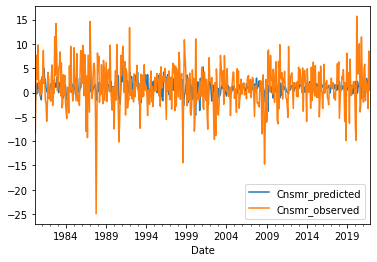

In [25]:
((final_forecasts[0].loc[:,["Cnsmr_predicted", "Cnsmr_observed"]])/100)..plot()

### MAE

In [19]:
def mae(actual,calculated):
    sum = 0
    
    for i in range(len(actual)):
        sum += abs(actual[i] - calculated[i])

    error = sum/len(actual)

    print("Mean absolute error : " + str(error))

In [20]:
for i in final_forecasts:
    actual = i.loc[:,i.columns[1]]
    calculated = i.loc[:,i.columns[0]]
    print(i.columns[0][:5])
    mae(actual,calculated)
    

Cnsmr
Mean absolute error : 3.4265235058006893
Manuf
Mean absolute error : 3.374686566289876
HiTec
Mean absolute error : 4.431455115119271
Hlth 
Mean absolute error : 3.70112229179852
Other
Mean absolute error : 4.010430906090122
